# Covid-19 Data Exploration and Visualizations

## Data Source

Covid-19 and RSV are all contagious respiratory illnesses but are caused by different viruses.

The visualizations and calculation displayed in this file attempt to answer the following questions:

1. What are the top 10 continents with the highest number of cases?
2. What are the unique continents in the dataset?
3. How does the number of covid-19 cases relate to the number of covid-19 deaths in Asia?
4. What is the sum of covid deaths in each continent in the dataset?

The data is from the [European Centre for Disease Prevention and Control](s3://surratt-241-2023-python/covid_data.xls)

Authors: Addison Surratt and Lauren Edwards

![covid_image](https://theshillongtimes.com/wp-content/uploads/2020/10/Covid-19.jpg)

In [7]:
%matplotlib inline
import pandas as pd

In [8]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.8 MB/s eta 0:00:00


## Importing Data from the S3 Bucket

In [9]:
df=pd.read_excel('s3://surratt-241-2023-python/covid_data.xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


Explanation:

This table displays the first five rows of data directly from the dataset. This data will be referenced in calculations and visualizations below. The column titles demonstrate the information that is included in the dataset as well as context for the following deptictions. 

## Top 3 Continents with Highest Covid Cases

In [10]:
sum_cases_per_country=df.groupby('continentExp').sum()['cases']

/tmp/ipykernel_6775/2810581920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_cases_per_country=df.groupby('continentExp').sum()['cases']


<AxesSubplot: xlabel='continentExp'>

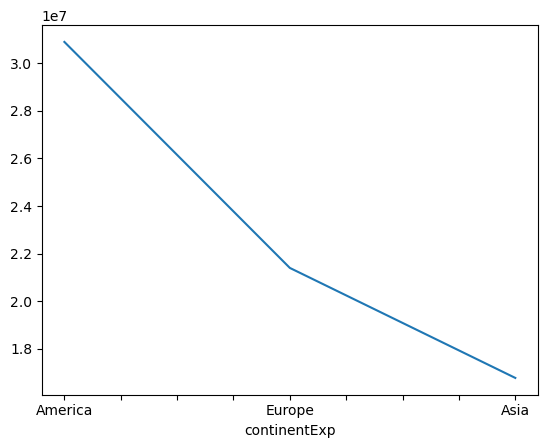

In [11]:
sum_cases_per_country.nlargest(3).plot()

Explanation:

This line graph depicts the top 3 continents that had the highest number of covid-19 cases between the continents included in the dataset. You can see that America had the most covid-19 cases followed by Europe. Asia had the lowest number of covid-19 cases between these three continents. 

Continents are displayed on the x-axis, and the number of cases are displayed on the y-axis. 

## List of Unique Continents

In [48]:
pd.unique(df['continentExp'])

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

Explanation:

The listed output of the code above represents each individual continent included in the dataset. 

## How the Number of Cases is Related to the Number of Deaths in Asia

### Asia Data

In [18]:
asia_data=df.loc[df['continentExp']=='Asia']
df[:50]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


Explanation:

To establish a background related to the question of how the number of covid-19 cases interacts with the number of covid-19 deaths in Asia, some basic data is diplayed above. 

The data in this table was pulled directly from the initial dataset. It displays the first 50 rows of data that are associated with the Asian continent and countries.  

### Scatter Plot

<AxesSubplot: xlabel='deaths', ylabel='cases'>

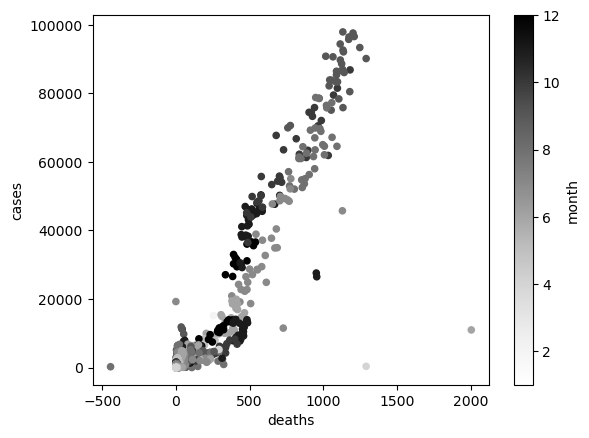

In [34]:
Asia_data.plot.scatter(x='deaths',y='cases',c='month')

Explanation:

This scatter plot answers the question of how covid-19 death numbers and case numbers are related. You can see from the scatter plot that as case numbers climb, death numbers climb. Deaths are displayed on the x-axis, and cases are displayed on the y-axis. The gradient bar to the right of the scatter plot indicated the month in which cases and/or deaths were present. 

## The Sum of Covid Deaths per Continent

<AxesSubplot: xlabel='continentExp'>

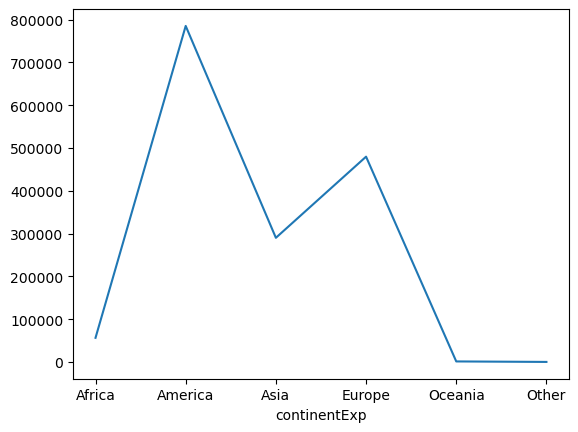

In [35]:
sum_cases_by_date = df.groupby('continentExp')['deaths'].sum()
sum_cases_by_date.plot()

Explanation:

This line graph represents the sum of covid-19 deaths in each continent included in the dataset. You can see that Africa had the highest sum of covid-19 deaths followed by America. Asia had the third highest sum of covid-19 deaths followed by Europe. Oceania and other countries has the lowest sum of covid-19 deaths. 

In this graph, continents are displayed on the x-axis, and the sum of deaths is diplayed on the y-axis. 

## Conclusion

Summary and Implications:

These visualizations indicate that the top 3 continents with the highest number of covid cases are America, Europe, and Asia. The unique continents included in the dataset include: America, Europe, Asia, Africa, Oceania, and other. The scatter plot regarding the relationship between covid-19 cases and deaths in Asia varies directly. As case numbers climb in Asia, the number of deaths go up. Lastly, the last visualization of a line graph demonstrates that Africa had the highest sum of covid-19 deaths following America, Asia, Europe, Oceania, and others. 

Limitations: 

A limitation in this dataset and visualization is that South America and Antarctica were not included, so their covid-19 statistics could not be compared to other continents. Additionally, the data refferenced in the visualizations above only included data from the year 2020. 

Additional questions and queries can be sent to the authors. Author information is listed below. 

Author Information:
Authors: Addison Surratt and Lauren Edwards
Emails: surratae@dukes.jmu.edu and edwardlx@dukes.jmu.edu